Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

Load and Inspect Excel File

In [2]:
# Load the Excel file
file_path = "dataSet.xlsx"
excel_file = pd.ExcelFile(file_path)

# Display sheet names
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

# Load all sheets to inspect their shapes
sheets = {name: excel_file.parse(name) for name in sheet_names}
print("\nSheet shapes:", {sheet: df.shape for sheet, df in sheets.items()})

# Display the first few rows of non-empty sheets
sample_data = {name: df.head() for name, df in sheets.items() if not df.empty}
print("\nSample data from sheets:", sample_data)

Sheet names: ['Feuil5', 'data for camel ', 'Feuil2']

Sheet shapes: {'Feuil5': (47, 11), 'data for camel ': (131, 12), 'Feuil2': (0, 0)}

Sample data from sheets: {'Feuil5':                                           Unnamed: 0      Unnamed: 1  \
0  Complete Data Table: Gelatin Extraction with N...             NaN   
1                                                NaN             NaN   
2                                      Source Animal  NaOH Conc. (M)   
3                                              Camel             0.5   
4                                              Camel            0.75   

              Unnamed: 2            Unnamed: 3           Unnamed: 4  \
0                    NaN                   NaN                  NaN   
1                    NaN                   NaN                  NaN   
2  Pretreatment Time (h)  Extraction Temp (°C)  Extraction Time (h)   
3                     42                    70                    5   
4                     42              

Load and Preprocess Data

In [3]:
# Load the specific sheet
df = pd.read_excel("dataSet.xlsx", sheet_name="data for camel ")

# Use second row as header and drop the first
df.columns = df.iloc[0]
df = df[1:]
df = df.loc[:, ~df.columns.isnull()]
df.columns = [str(col).strip() for col in df.columns]

# Drop unnamed columns
df = df.loc[:, ~df.columns.str.contains("Unnamed", na=False)]

# Clean 'Age' column
df['Age'] = df['Age'].astype(str).str.strip().map({'Y': 0, 'O': 1})

# Convert other columns to numeric
for col in df.columns:
    if col != 'Age':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where 'yield' is missing and fill remaining NaNs with 0
df = df.dropna(subset=['yield'])
df = df.fillna(0)

# Prepare features and target
X = df.drop(columns=['yield'])
y = df['yield']

Train and Evaluate Model

In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
accuracy = 100 * (1 - (abs(y_pred - y_test) / y_test)).mean()
print(f"Mean Relative Accuracy: {accuracy:.2f}%")

MSE: 2.176736073076918
R²: 0.7810714397768277
Mean Relative Accuracy: 90.03%


Save Model

In [5]:
# Save the model
joblib.dump(model, 'yield_predictor.pkl')
print("Model saved as 'yield_predictor.pkl'")

Model saved as 'yield_predictor.pkl'


Scatter Plot - Actual vs Predicted

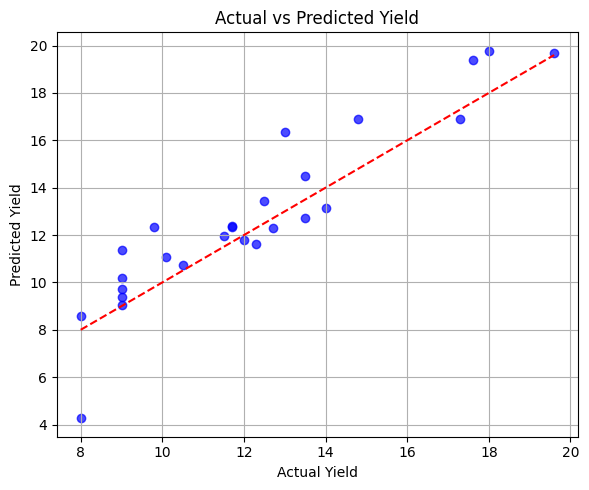

In [6]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.grid(True)
plt.tight_layout()
plt.show()

Residual Plot

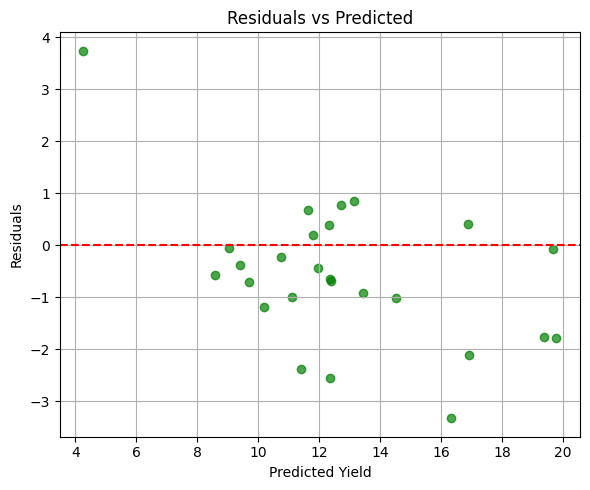

In [7]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, residuals, color='green', alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Yield")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Importance Plot

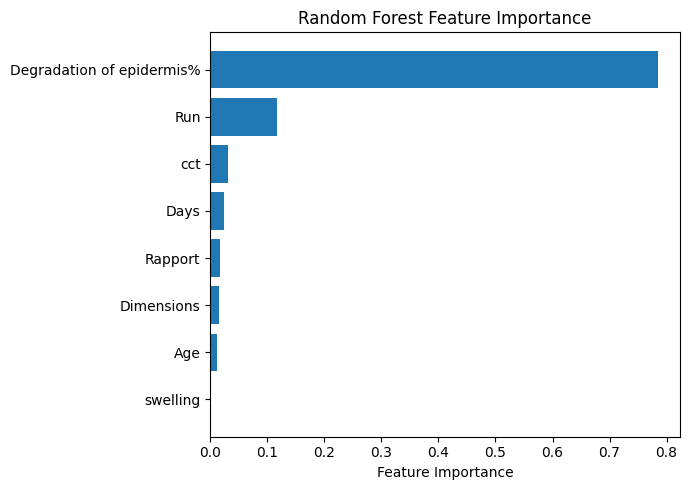

In [8]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(7, 5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

Histogram of Prediction Errors

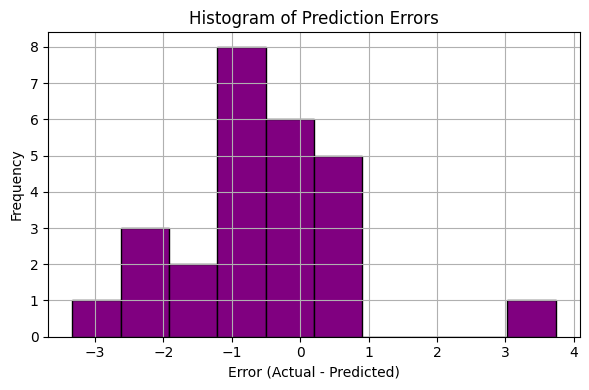

In [9]:
errors = y_test - y_pred
plt.figure(figsize=(6, 4))
plt.hist(errors, bins=10, color='purple', edgecolor='black')
plt.title("Histogram of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

Actual vs Predicted (Sorted) Plot

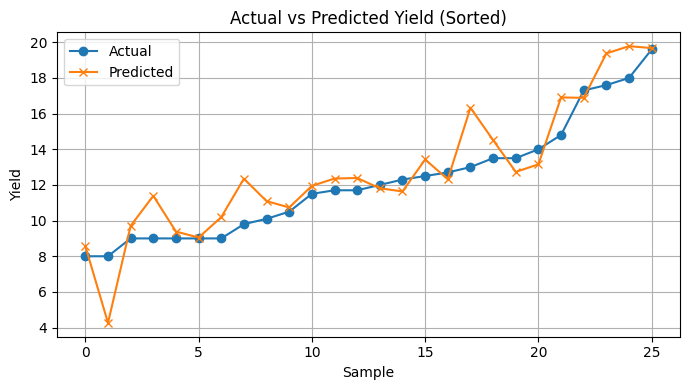

In [10]:
sorted_idx = np.argsort(y_test.values)
plt.figure(figsize=(7, 4))
plt.plot(y_test.values[sorted_idx], label="Actual", marker='o')
plt.plot(y_pred[sorted_idx], label="Predicted", marker='x')
plt.title("Actual vs Predicted Yield (Sorted)")
plt.xlabel("Sample")
plt.ylabel("Yield")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Boxplot of Prediction Errors

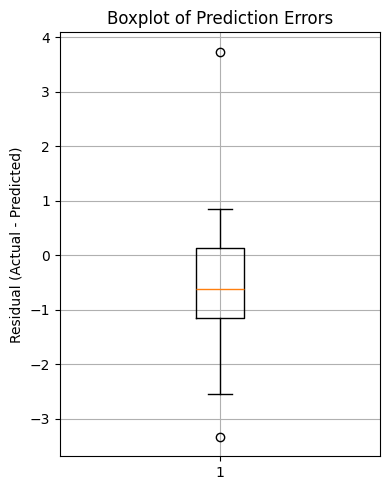

In [11]:
plt.figure(figsize=(4, 5))
plt.boxplot(errors, vert=True)
plt.title("Boxplot of Prediction Errors")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

Prediction Confidence vs Error

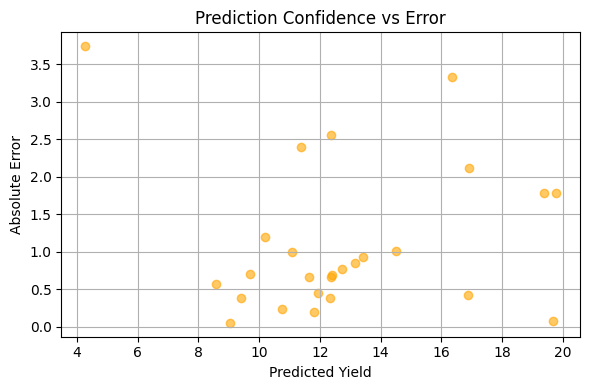

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, abs(errors), alpha=0.6, color='orange')
plt.xlabel("Predicted Yield")
plt.ylabel("Absolute Error")
plt.title("Prediction Confidence vs Error")
plt.grid(True)
plt.tight_layout()
plt.show()